In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
raw_data = pd.read_csv(
    "../data/raw/raw.tsv", sep='\t'
)
raw_data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [3]:
raw_data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


In [6]:
cond = raw_data['ref_tox'] < raw_data['trn_tox']

raw_data.loc[cond, ['reference', 'translation']] = raw_data.loc[cond, ['translation', 'reference']].values
raw_data.loc[cond, ['ref_tox', 'trn_tox']] = raw_data.loc[cond, ['trn_tox', 'ref_tox']].values
raw_data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.940260,0.035601
std,166789.997578,0.092695,0.108057,0.100831,0.079399
min,0.000000,0.600001,0.000000,0.500139,0.000033
25%,144444.000000,0.681105,0.066667,0.940145,0.000164
50%,288888.000000,0.754439,0.141791,0.983842,0.003456
75%,433332.000000,0.831244,0.238095,0.997519,0.027242
max,577776.000000,0.950000,0.400000,0.999730,0.499494


In [7]:
raw_data.loc[raw_data['similarity']<0.7]

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
6,6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
13,13,"Come on, Cal, leave that shit alone.","come on, Cal, put it down.",0.660481,0.270270,0.999637,0.000279
14,14,he's the tallest son of a bitch.,So he's the Top dog.,0.611092,0.363636,0.999639,0.000920
17,17,"to quote Jake and Oppenheimer: ""I must die, I ...","To quote Jake Oppenheimer: I, who am about to ...",0.699590,0.178947,0.682655,0.002348
...,...,...,...,...,...,...,...
577763,577763,"oh, and hell.","Oh, crud.",0.660415,0.285714,0.807995,0.019170
577766,577766,tell the doctor I'm going to throw the poo.,Tell the doctor I'm dropping a deuce.,0.646018,0.136364,0.874277,0.000456
577771,577771,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.671444,0.371212,0.999624,0.035941
577774,577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049


In [8]:
raw_data.loc[raw_data['similarity']<0.7]

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
6,6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
13,13,"Come on, Cal, leave that shit alone.","come on, Cal, put it down.",0.660481,0.270270,0.999637,0.000279
14,14,he's the tallest son of a bitch.,So he's the Top dog.,0.611092,0.363636,0.999639,0.000920
17,17,"to quote Jake and Oppenheimer: ""I must die, I ...","To quote Jake Oppenheimer: I, who am about to ...",0.699590,0.178947,0.682655,0.002348
...,...,...,...,...,...,...,...
577763,577763,"oh, and hell.","Oh, crud.",0.660415,0.285714,0.807995,0.019170
577766,577766,tell the doctor I'm going to throw the poo.,Tell the doctor I'm dropping a deuce.,0.646018,0.136364,0.874277,0.000456
577771,577771,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.671444,0.371212,0.999624,0.035941
577774,577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049


Text(0.6338328541196, 0, '0.63383')

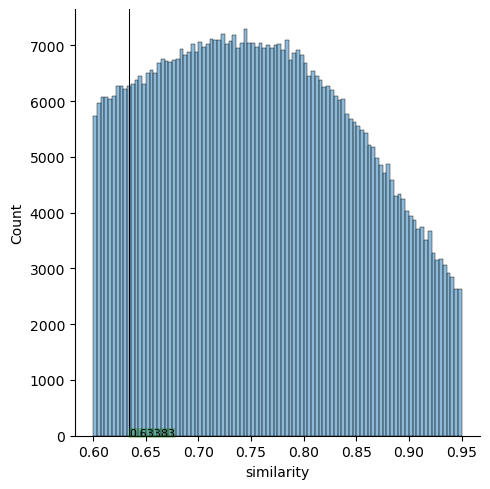

In [9]:
sns.displot(x=raw_data['similarity'], alpha=0.5, linewidth=0.3)

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
similarity_bb = raw_data["similarity"].quantile(0.1)
plt.axvline(similarity_bb, 0, 1, color="black", linewidth=0.75)
plt.text(similarity_bb, 0, similarity_bb.round(5), fontsize=8, bbox=bbox)

In [10]:
raw_data = raw_data.loc[raw_data['similarity']>0.63]
raw_data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


Text(0.8553578468039634, 0, '0.85536')

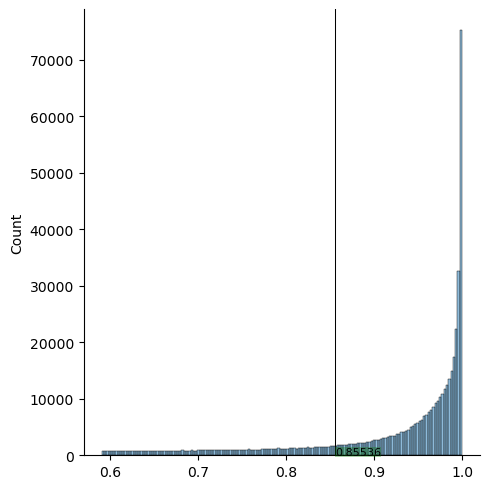

In [16]:
sns.displot(x=raw_data['ref_tox']-raw_data['trn_tox'], alpha=0.5, linewidth=0.3)

bbox = dict(facecolor='green', alpha=0.3, pad=0.05, edgecolor='none')
similarity_bb = (raw_data['ref_tox']-raw_data['trn_tox']).quantile(0.2)
plt.axvline(similarity_bb, 0, 1, color="black", linewidth=0.75)
plt.text(similarity_bb, 0, similarity_bb.round(5), fontsize=8, bbox=bbox)

In [17]:
raw_data = raw_data.loc[raw_data['ref_tox']-raw_data['trn_tox']>0.85]
raw_data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402
5,5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846


In [18]:
raw_data.to_csv('../data/interim/preprocessed.tsv', sep="\t") 

In [19]:
raw_data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,404575.000000,404575.000000,404575.000000,404575.000000,404575.000000
mean,289065.333661,0.766178,0.159189,0.977344,0.013253
std,166864.544551,0.083596,0.108563,0.030053,0.023913
min,0.000000,0.630000,0.000000,0.850045,0.000034
25%,144519.500000,0.695919,0.066667,0.968416,0.000119
50%,288924.000000,0.759668,0.142857,0.990511,0.001762
75%,433740.500000,0.830085,0.240741,0.998266,0.015229
max,577776.000000,0.950000,0.400000,0.999730,0.149429
